In [24]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import math
from numpy import linalg as LA

In [2]:
%config IPCompleter.greedy=True

In [3]:
df = pd.read_csv('~/Master Thesis/Data/iris.csv')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Encode String Attribute to Integer**

In [5]:
enc = LabelEncoder()
enc.fit(df['species'])
df['species']= enc.transform(df['species'])

**Principal Component Analysis for Dimentionality Reduction**

In [6]:
pca = PCA(n_components=3)
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [7]:
df_3d=pca.transform(df)

In [8]:
df_3d

array([[-2.86550669e+00,  3.02780442e-01,  4.84897211e-02],
       [-2.89321339e+00, -1.76987146e-01, -1.68798182e-01],
       [-3.05574910e+00, -1.68006289e-01,  5.65424149e-02],
       [-2.92124902e+00, -3.25027211e-01,  9.80010810e-03],
       [-2.90675140e+00,  3.02332724e-01,  1.53720302e-01],
       [-2.48899988e+00,  7.39727187e-01,  2.00679240e-01],
       [-2.99106535e+00, -1.16739834e-01,  2.50385821e-01],
       [-2.81105291e+00,  1.55635814e-01,  1.66268489e-02],
       [-3.05248032e+00, -5.89687583e-01, -9.28733240e-03],
       [-2.85470148e+00, -1.11633294e-01, -1.64955858e-01],
       [-2.70085679e+00,  6.36298840e-01,  2.34535897e-02],
       [-2.79784383e+00,  8.04346801e-03,  8.99945580e-02],
       [-2.96034027e+00, -2.39025333e-01, -1.67059861e-01],
       [-3.36757216e+00, -5.53686579e-01,  9.81963025e-02],
       [-2.83079955e+00,  1.14659075e+00,  7.49186344e-02],
       [-2.58796715e+00,  1.30810539e+00,  4.03602440e-01],
       [-2.80918503e+00,  7.79232365e-01

In [29]:
sample = df_3d

**Elbow Implimentation with SD Validation Index**

*Reference :https://cran.r-project.org/web/packages/clusterCrit/vignettes/clusterCrit.pdf page 16   https://pdfs.semanticscholar.org/adef/c554b325e4bcb52dff292d6462c6ce20630d.pdf*

In [36]:
RMSSTD={}
SD_INDEX={}
K = range(1,10)

#Variance of whole data and its Euclidean Norm
sample_variance = pd.DataFrame(sample,columns=["PC1","PC2","PC3"]).var()
sample_variance_norm = LA.norm(sample_variance,2)
print("Sample variance ="+str(sample_variance))
for k in K :
    RMSSTD[k]=0
    variance_norm=0
    kmeansModel = KMeans(n_clusters=k)
    labels= kmeansModel.fit_predict(sample)
    centers = kmeansModel.cluster_centers_
    sample_transformed = kmeansModel.fit_transform(sample)
    for i in range(0,k):
        cluster_datapoints = pd.DataFrame(sample[labels==i],columns=["PC1","PC2","PC3"])
        #print(cluster_datapoints.head())
        
        #Mean Value of each dimention of datapoints in this cluster
        cluster_mean = cluster_datapoints.mean(axis=0)
        
        # Calculating Average Scattering for cluster
        cluster_variance = cluster_datapoints.var()
        #print(cluster_variance)
        
        # Calculating sum of Euclidean Norm or variance measured above for each cluster
        variance_norm += LA.norm(cluster_variance,2)
        #print("variance ="+str(variance_norm))
        
        
    #print("RMSSTD = "+str(RMSSTD))
    mean_var_norm=variance_norm/k
    avg_scattering =  mean_var_norm/sample_variance_norm
    print("Avg Scatering ="+str(avg_scattering))

Sample variance =PC1    4.835035
PC2    0.252086
PC3    0.095898
dtype: float64
Avg Scatering =1.0
Avg Scatering =0.1513308785125213
Avg Scatering =0.07453329005501048
Avg Scatering =0.05452793970380542
Avg Scatering =0.04043738123190415
Avg Scatering =0.032394682907123516
Avg Scatering =0.02739661116564779
Avg Scatering =0.0226468236163339
Avg Scatering =0.020000706200338312


**Ploting Elbow**

In [11]:
SSE_array=[]
slope=[]
for key,value in RMSSTD.items():
    SSE_array.append(value)
print(SSE_array)

#Calculate slope of each line
for p in range(1,9):
    s= (SSE_array[p]-SSE_array[p-1])
    slope.append([p+1,s])
slope

[308.9217270410685, 136.2594239818456, 93.77541224052878, 84.18358508277856, 72.45598255171426, 65.77342389039107, 58.71548565818364, 54.8308767960283, 52.964909880577906]


[[2, -172.6623030592229],
 [3, -42.48401174131682],
 [4, -9.591827157750217],
 [5, -11.727602531064306],
 [6, -6.682558661323185],
 [7, -7.057938232207434],
 [8, -3.884608862155339],
 [9, -1.865966915450393]]

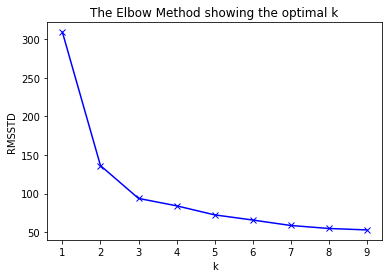

In [12]:
plt.plot(K,SSE_array,'bx-')
plt.xlabel('k')
plt.ylabel('RMSSTD')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [13]:
slope

[[2, -172.6623030592229],
 [3, -42.48401174131682],
 [4, -9.591827157750217],
 [5, -11.727602531064306],
 [6, -6.682558661323185],
 [7, -7.057938232207434],
 [8, -3.884608862155339],
 [9, -1.865966915450393]]

In [14]:
#chose the value after which there is a reduction in gain(rather loss)
for a in range(0,7):
    change_slope=(slope[a])[-1] - (slope[a+1])[-1]
    if change_slope > 0:
        print('Optimal Number of Clusters = '+str((slope[a][0])-1))

Optimal Number of Clusters = 3
Optimal Number of Clusters = 5
